<a href="https://colab.research.google.com/github/Danielle504/CAP4630/blob/master/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Danielle Garsten
CAP4630, Spring 2020

# **Problem 1**

Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [80]:
def get_random_data(w, b, mu, sigma, m):
  data = []
  labels = []
  for i in range(m):
    c = np.random.randint(low = 0, high = 2, size = 1)
    labels.append(random.randint(0,1))
    x_1 = random.random() 
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 
    x_2 += b
    x_2 += ((-1)**labels[i]) * n
    data.append([x_1, x_2])
  data = np.array(data)
  labels = np.array(labels)
  print(d.shape)
  return data, labels

d, l =  get_random_data(25, 15, 25, 8, 1000)
print(d)
print(l)

(1000, 2)
[[ 3.71424563e-02 -1.39324141e-02]
 [ 9.25217025e-01  6.54095072e+01]
 [ 4.01879155e-01  5.69820306e+00]
 ...
 [ 2.20442541e-01 -7.80013235e+00]
 [ 1.51712078e-01 -1.21278182e+00]
 [ 7.92731375e-01  5.06378163e+01]]
[1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1

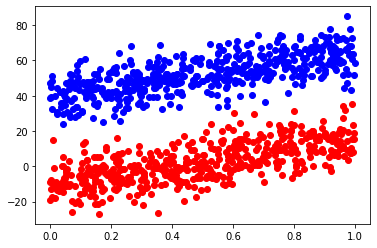

In [81]:
# display_random_data creates scatter plot of the 2D points stored in data
def display_random_data(data, labels):
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            x_2.append(data[i][0])
            y_2.append(data[i][1])
        else:
            x_1.append(data[i][0])
            y_1.append(data[i][1])
    plt.scatter(x_1, y_1, c='red')
    plt.scatter(x_2, y_2, c='blue')

display_random_data(d, l)

In [0]:
train_size = int(l.shape[0] * .8)
test_size = int(l.shape[0] * .2)

In [0]:
# Creating the training and testing data
train_data = d[:train_size]
test_data = d[train_size:]
train_labels = l[:train_size]
test_labels = l[train_size:]

# **Problem 2**

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

In [0]:
%tensorflow_version 2.x
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

In [115]:
in_dim = 2
out_dim = nb_class = 1
batch_size = 256
epochs = 300

model = Sequential()
model.add(Dense(out_dim, input_dim=in_dim, activation='sigmoid'))

# Model for learning and how to showcase most accurate trained data
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels))
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/300
4/4 [==============================] - 0s 31ms/step - loss: 33.1060 - accuracy: 0.2763 - val_loss: 32.1217 - val_accuracy: 0.3050
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 29.3690 - accuracy: 0.2763 - val_loss: 31.9766 - val_accuracy: 0.3050
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 32.7978 - accuracy: 0.2763 - val_loss: 31.8332 - val_accuracy: 0.3050
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 33.3377 - accuracy: 0.2763 - val_loss: 31.7021 - val_accuracy: 0.3050
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 33.5081 - accuracy: 0.2750 - val_loss: 31.5781 - val_accuracy: 0.3050
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 30.0076 - accuracy: 0.2750 - val_loss: 31.4699 - val_accuracy: 0.3050
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 31.9617 - accuracy: 0.2750 - val_loss: 31.3543 - val_accuracy: 0.3050
Epoch 

In [0]:
dense_layer = model.layers[0]
weights, bias = dense_layer.get_weights()

w_1 = weights[0]
w_2 = weights[1]
b_1 = bias

my_weight = 20
my_bias = 10
my_mu = 20
my_sigma = 6
my_m = 10000

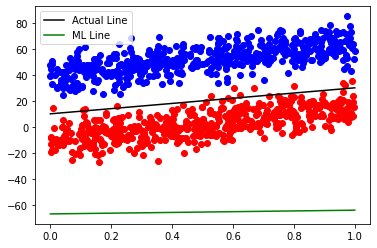

In [118]:
# Creating the graph of Real versus Trained data
display_random_data(d, l)
x_1 = np.linspace(0, 1)
x_2_truth = x_1 * my_weight + my_bias
x_2_pred = x_1 * (-w_1/w_2) + (-b_1/w_2)
plt.plot(x_1, x_2_truth, c='black', label='Actual Line')
plt.plot(x_1, x_2_pred, c='green', label='ML Line')
plt.legend()

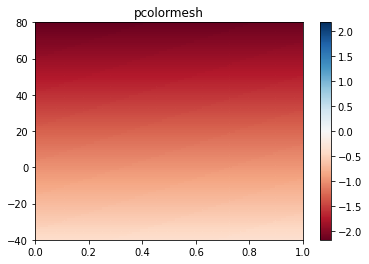

In [120]:
y, x = np.meshgrid(np.linspace(-40, 80, 100), np.linspace(0, 1, 100))

z = w_1 * x + w_2 * y + bias
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

#**Problem 3**

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Sigmoid:
$ \frac{1}{1 + e^-z} $

Binary Cross-Entropy Loss Function: 

***-yloga-(1-y)log(1-a)***

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
np.random.seed(42)

xs = 2 * np.random.rand(100, 1)
ys = 4 + 3 * xs + np.random.rand(100, 1)

In [0]:
plt.plot(xs, ys, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# split the data into training and test sets
# train set
train_xs = xs[:80]
train_ys = ys[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weight w and bias b
w = np.random.randn(1)
w_2 = np.random.randn(1)
b = np.zeros(1)

In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w * train_xs[i] + w_2 * training_data[i][1] + b
    a = sigmoid(y_pred)
    
    grad_w = (a - training_labels[i]) * training_data[i][0]
    grad_w_2 = (a - training_labels[i]) * training_data[i][1]
    grad_b = (a - training_labels[i])
    
    w -= lr * grad_w
    b -= lr * grad_b
    w_2 -= lr * grad_w_2

In [0]:
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w * test_xs[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [0]:
test_loss

In [0]:
pred_ys = w * test_xs + b

In [0]:
plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
b

In [0]:
w

#**Sources**

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu